K-Means clustering on Iris dataset

Descriptive statistics

Checking Missing Value

Exploratory Data analysis-EDA

Clustering using Elbow method


Importing necesssary libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

In [3]:
iris_data=pd.read_csv('C:/Users/SUNNY/Downloads/Iris.csv')
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Data Collection

In [4]:
iris_df=iris_data.drop(columns=['Id'])
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Shape Of Data

In [6]:
iris_df.shape

(150, 5)

Data type of each attribute

In [5]:
iris_data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [8]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Finding species count

In [7]:
iris_df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Detection of null values in data

In [8]:
iris_df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Explanatory Data Analysis(EDA)

<AxesSubplot:>

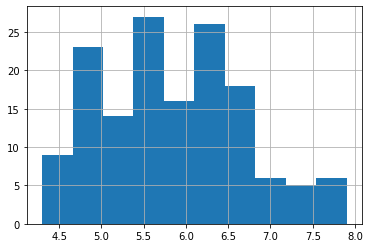

In [9]:
iris_df['SepalLengthCm'].hist()

<AxesSubplot:>

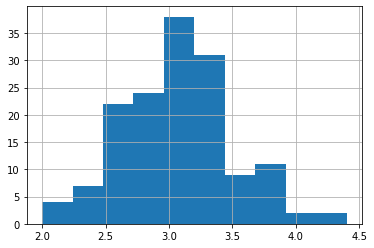

In [10]:
iris_df['SepalWidthCm'].hist()

<AxesSubplot:>

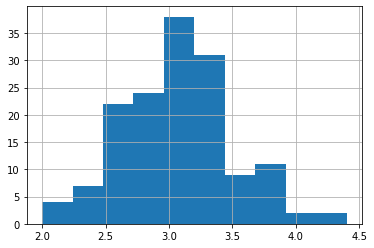

In [11]:
iris_df['SepalWidthCm'].hist()

<AxesSubplot:>

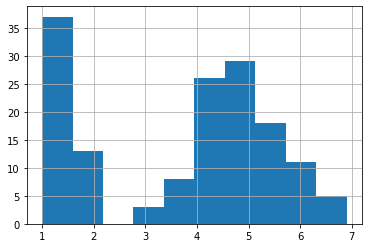

In [12]:
iris_df['PetalLengthCm'].hist()

<AxesSubplot:>

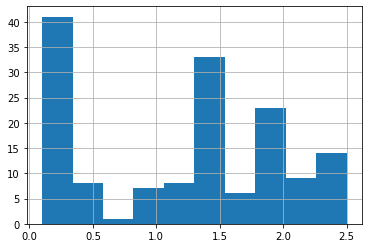

In [13]:
iris_df['PetalWidthCm'].hist()

In [14]:
x=iris_df.iloc[:,[0,1,2,3]].values

K Means Clustering

In [15]:
from sklearn.cluster import KMeans
wcss=[]

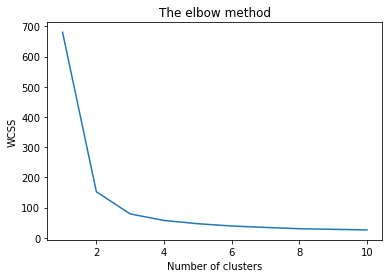

In [16]:
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',
                 max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

OBSERVATION:As the Elbow is projecting between clusters 2 and 4, hence the optimal number of clusters will be 3.

In [17]:
kmeans=KMeans(n_clusters=3,init='k-means++',
              max_iter=300, n_init=10, random_state=0)
y_kmeans=kmeans.fit_predict(x)

Deriving the scatter plot with the values from the K Means

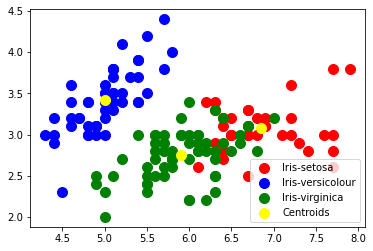

In [18]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

Hence No of Cluster identified = 3 and above is the visual representation of the same.